<a href="https://colab.research.google.com/github/head4ths/CEI/blob/master/part3_%EC%83%81%EA%B4%80%EA%B4%80%EA%B3%84%20%EB%B6%84%EC%84%9D" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
상관관계 분석 샘플_2020 1학기 인공지능 과제4번

# HW4 - Data Analysis & Make Prediction Models

#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2020
#### Due : 7/01 (wednes)  11:59 PM [Through Black board]

## Assignment Credit

### Your assignments are 40% of the total score. The scores for each assignment are as follows.
- __HW#1: 5%__
- __HW#2: 10%__
- __HW#3: 10%__
- __HW#4: 15%__

## Python Assingment HW4 Guide
- You need to fill out your code in ###YOUR CODE HERE### or #TODO.
- The code results should be the same as the results displayed below the code or the format we gave in problem description.
- When solving descriptive problems, both __Korean and English are available.__
- The some libraries are already imported below. __But you should import more.__
    - If you don't have some libraries, install it with pip or conda command. [Google will help you]

## Problem1. Scikit-learn
- Scikit-learn is the most common python library in machine learning.
- Let's port our work from matplotlib to scikit-learn.
- However, not all plots will be handled. We will focus on the most recent data, 2010-2015.

<b>URL:</b> http://scikit-learn.org/
<br/><b>Install guide:</b> http://scikit-learn.org/stable/install.html

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import time
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

import nltk
from sklearn import preprocessing
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

## Problem1. Regression Model
## -Amzon stock price prediction.

### Problem 1-1
- In this problem you will predict stock price only with price related data. People usually call it as Technical analysis.
- Find best combination of parameters to predict next day price.
- __Your MSE loss should be lower than 30.__

In [ ]:
# TODO : load data 'AMZN.csv'
#Hint: use pd.read_csv and set read_csv function paramete 'index_col' to set Date  variable to data` Index.
raw_data = pd.read_csv("./data/AMZN.csv", index_col='Date')

In [ ]:
raw_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200


<br/><br/>
- We will use only __one kind of variable__ for __last 'lookback' days__ to predict next day close price.<br/>
For example, if we set lookback days as 5, and use close price for our independent variable.<br/><br/>
Close price of [1997-05-15, 1997-05-16, 1997-05-19, 1997-05-20, 1997-05-21] --> predict [1997-05-22] <br/><br/>

In [ ]:
"""
TODO : make get_concated_data function.
       this function create x and y data

@Function
get_concated_data

@Inputs
__
raw_data : dataframe, full Amazon stock data.
     

@Returns
___

x_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback, lookback]
    : x_data should be made based on 'col_name', parameters of the function, variable we will use
    
y_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback]
    : y should be always made based on 'Close'.
"""

"\nTODO : make get_concated_data function.\n       this function create x and y data\n\n@Function\nget_concated_data\n\n@Inputs\n__\nraw_data : dataframe, full Amazon stock data.\n     \n\n@Returns\n___\n\nx_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback, lookback]\n    : x_data should be made based on 'col_name', parameters of the function, variable we will use\n    \ny_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback]\n    : y should be always made based on 'Close'.\n"

In [ ]:
# We will use only one kind of variable as a time series data
def get_concated_data(raw_data, col_name, lookback):
    x_datas = list()
    y_datas = list()
    # col_name : Variable to be used
    col_data = raw_data[col_name].values
    # aggregate target variable data for length of lookback days
    
    ##### Your Code Here ####
    ##HInt: use for function and append function in for function x,y data to x_datas,y_datas
    for i in range(len(raw_data)-lookback):
      x_subs = list()
      for j in range(lookback):
        x_subs.append(raw_data[col_name][i+j])
     
      x_datas.append([x_subs])
      y_datas.append(raw_data["Close"][i+lookback])
 
   ##########################    
    x_data = np.concatenate(x_datas,0)
    y_data = np.asarray(y_datas)
 
    return x_data, y_data

In [ ]:
"""
TODO : make split_data function which split train / test (last 60 data, approximately 3 month)

@Function
split_datas

@Inputs
__
data : numpy array
     
@Returns
___
x_train, x_test, y_train, y_test
    :<class 'numpy.ndarray'>

"""

"\nTODO : make split_data function which split train / test (last 60 data, approximately 3 month)\n\n@Function\nsplit_datas\n\n@Inputs\n__\ndata : numpy array\n     \n@Returns\n___\nx_train, x_test, y_train, y_test\n    :<class 'numpy.ndarray'>\n\n"

In [ ]:
def split_datas(x,y):
    ##### Your Code Here ####
    ##hint: for time series data yo should not split data randomly ,just split data '0:your split parameter' , 'split parameter: last'
    x_train, x_test = np.split(x, [len(x) - 60], axis=0) 
    y_train, y_test = np.split(y, [len(y) - 60], axis=0) 
    ###########################
    return x_train, x_test, y_train, y_test

In [ ]:
x, y = get_concated_data(raw_data, 'Close', 5)
x[:10], y[:10]

(array([[1.958333, 1.729167, 1.708333, 1.635417, 1.427083],
        [1.729167, 1.708333, 1.635417, 1.427083, 1.395833],
        [1.708333, 1.635417, 1.427083, 1.395833, 1.5     ],
        [1.635417, 1.427083, 1.395833, 1.5     , 1.583333],
        [1.427083, 1.395833, 1.5     , 1.583333, 1.53125 ],
        [1.395833, 1.5     , 1.583333, 1.53125 , 1.505208],
        [1.5     , 1.583333, 1.53125 , 1.505208, 1.5     ],
        [1.583333, 1.53125 , 1.505208, 1.5     , 1.510417],
        [1.53125 , 1.505208, 1.5     , 1.510417, 1.479167],
        [1.505208, 1.5     , 1.510417, 1.479167, 1.416667]]),
 array([1.395833, 1.5     , 1.583333, 1.53125 , 1.505208, 1.5     ,
        1.510417, 1.479167, 1.416667, 1.541667]))

In [ ]:
x_train, x_test, y_train, y_test = split_datas(x, y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((5223, 5), (5223,), (60, 5), (60,))

### <br/>Problem 1-2 Find best parameter combination 
- You can choose which __columns to use__ as variable for __how many days__, and in which __polynomial space.__
- Find the best combination of parameters to predict next day price.
- __Find combination which makes MSE loss for train data lower than 6.__

In [ ]:
# TODO : complete run_regression function
# Hint : use api i gave below

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model
from sklearn.pipeline import Pipeline

def run_regression(raw_data, column_name, lookback_days, poly_degree):
    # performing regression analysis with specified parameters
    x, y = get_concated_data(raw_data, column_name, lookback_days)
    x_train, x_test, y_train, y_test = split_datas(x, y)

    ##### Your Code Here ####
    poly = PolynomialFeatures(degree=poly_degree)
    PolynomialRegression = Pipeline([('poly', poly), ('linear', LinearRegression(fit_intercept=False))])
    X_train = x_train
    X_test = x_test
    
    model = PolynomialRegression.fit(X_train,y_train) #fit the model
    train_pred = model.predict(X_train) # for train which data you have to use?
    test_pred = model.predict(X_test) # for test which data you have to use?

    ########################
    print ("MSE - Train %.4f"%mean_squared_error(model.predict(X_train), y_train))
    print ("MSE - Test %.4f"%mean_squared_error(model.predict(X_test), y_test))
    
    return test_pred, y_test

In [ ]:
# TODO : run experiment with various combination
test_pred, y_test = run_regression(raw_data, column_name='Close', lookback_days=12, poly_degree=4)

MSE - Train 3.4023
MSE - Test 1691946114.1521


Write Combination that you've found. (Train loss lower than 6) <br/><br/>
 
아래 조합에서 Train loss가 6보다 작은수치 (3.4023) 을 보인다 
 
 
 
Variable : 'Close'      <br/>
Lookback : 12      <br/>
Poly_degree : 4      <br/>

### Problem 1-3 Overfitting & Underfitting
1. Briefly explain about the concept of overfitting and underftting with proper example that you can find from experiment above.
2. In the above problem desciption, I set your goal as fiding best parameters for total data loss. What is wrong with it? 

### YOUR ANSWER HERE ###

1. 
poly degree 를 2로 고정후 lookback days를 증가시킨 아래 실험 결과수치를 보면 lookback_days=3일때 Test Set 에 대하여 가장 좋은 예측을 한다.
 
 1,2일때는 아직 최적화가 덜 되어 underfitting 상태라 좋은 결과가 나오지 않고 
 
 4 이상으로 갈 수록 overfitting 되어 Test 결과는 나빠진다
 
 
 
 
 
 
 
>           
       1    MSE - Train 33.1145 MSE - Test 877.8698 
       2    MSE - Train 33.1123 MSE - Test 878.7510 
       3    MSE - Train 32.5771 MSE - Test 790.4253  
       4    MSE - Train 31.9299 MSE - Test 916.1620 
       5    MSE - Train 31.4248 MSE - Test 1034.9483    
       6    MSE - Train 30.3716 MSE - Test 1136.6640    
       7    MSE - Train 30.0512 MSE - Test 1255.1426    
       8    MSE - Train 29.5902 MSE - Test 1442.7287    
       9    MSE - Train 29.3321 MSE - Test 1445.9034    
      10    MSE - Train 28.6467 MSE - Test 1617.0214
      ※ Poly_degree=2 lookback_days=1~10
 
 
 
 
2. 
Train Set 에 대한 loss 값은 오버피팅 된 상태에서도 계속 좋게 나오므로 Test Set 에 대한 loss 값을 사용해야 오버피팅을 피할 수 있다

### Problem 1-4 Visualization
- Visualize your predicton.
- You can use code below with proper variable.
- __Your best model's prediction --> best_pred.__

In [ ]:
# TODO : Assign your best prediction for test data to best_pred
best_pred, _ = run_regression(raw_data, column_name='Close', lookback_days=3, poly_degree=2)

MSE - Train 32.5771
MSE - Test 790.4253


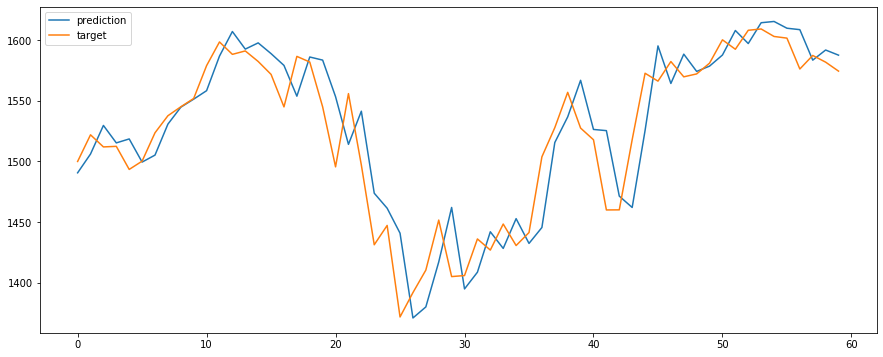

In [ ]:
from matplotlib import pyplot as plt

plt.figure(figsize=(15,6))
plt.plot(best_pred, label='prediction')
plt.plot(y_test, label='target')
plt.legend(loc='best', fontsize=10)
plt.show()

## Problem2. Regression Model
## -Covid Confirmed prediction.

In [ ]:
#import covidall dataset 
train = pd.read_csv('./data/train.csv')
all_data = pd.read_csv('./data/covid_all.csv') #set your working directory
all_data

,Unnamed: 0,index,Id,Province_State,Country_Region,Date,ConfirmedCases,Fatalities,ForecastId,Day_num,...,Trend_Fatalities_2,Trend_Fatalities_3,Trend_Fatalities_4,Trend_Fatalities_5,Trend_Fatalities_6,Population (2020),Density,Land Area,Med Age,Urban Pop
0,0,0,1.0,83,0,2020-01-22,0.0,0.0,-1.0,0,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
1,1,1,2.0,83,0,2020-01-23,0.0,0.0,-1.0,1,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
2,2,2,3.0,83,0,2020-01-24,0.0,0.0,-1.0,2,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
3,3,3,4.0,83,0,2020-01-25,0.0,0.0,-1.0,3,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
4,4,4,5.0,83,0,2020-01-26,0.0,0.0,-1.0,4,...,0.0,0.0,0.0,0.0,0.0,38742911.0,60.0,652860.0,18.0,25.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35677,35677,13454,-1.0,83,183,2020-05-10,0.0,0.0,13455.0,109,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
35678,35678,13455,-1.0,83,183,2020-05-11,0.0,0.0,13456.0,110,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
35679,35679,13456,-1.0,83,183,2020-05-12,0.0,0.0,13457.0,111,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0
35680,35680,13457,-1.0,83,183,2020-05-13,0.0,0.0,13458.0,112,...,0.0,0.0,0.0,0.0,0.0,14818157.0,38.0,386850.0,19.0,38.0


In [ ]:
country_dict = {'Afghanistan': 0,
 'Albania': 1,
 'Algeria': 2,
 'Andorra': 3,
 'Angola': 4,
 'Antigua and Barbuda': 5,
 'Argentina': 6,
 'Armenia': 7,
 'Australia': 8,
 'Austria': 9,
 'Azerbaijan': 10,
 'Bahamas': 11,
 'Bahrain': 12,
 'Bangladesh': 13,
 'Barbados': 14,
 'Belarus': 15,
 'Belgium': 16,
 'Belize': 17,
 'Benin': 18,
 'Bhutan': 19,
 'Bolivia': 20,
 'Bosnia and Herzegovina': 21,
 'Botswana': 22,
 'Brazil': 23,
 'Brunei': 24,
 'Bulgaria': 25,
 'Burkina Faso': 26,
 'Burma': 27,
 'Burundi': 28,
 'Cabo Verde': 29,
 'Cambodia': 30,
 'Cameroon': 31,
 'Canada': 32,
 'Central African Republic': 33,
 'Chad': 34,
 'Chile': 35,
 'China': 36,
 'Colombia': 37,
 'Congo (Brazzaville)': 38,
 'Congo (Kinshasa)': 39,
 'Costa Rica': 40,
 "Cote d'Ivoire": 41,
 'Croatia': 42,
 'Cuba': 43,
 'Cyprus': 44,
 'Czechia': 45,
 'Denmark': 46,
 'Diamond Princess': 47,
 'Djibouti': 48,
 'Dominica': 49,
 'Dominican Republic': 50,
 'Ecuador': 51,
 'Egypt': 52,
 'El Salvador': 53,
 'Equatorial Guinea': 54,
 'Eritrea': 55,
 'Estonia': 56,
 'Eswatini': 57,
 'Ethiopia': 58,
 'Fiji': 59,
 'Finland': 60,
 'France': 61,
 'Gabon': 62,
 'Gambia': 63,
 'Georgia': 64,
 'Germany': 65,
 'Ghana': 66,
 'Greece': 67,
 'Grenada': 68,
 'Guatemala': 69,
 'Guinea': 70,
 'Guinea-Bissau': 71,
 'Guyana': 72,
 'Haiti': 73,
 'Holy See': 74,
 'Honduras': 75,
 'Hungary': 76,
 'Iceland': 77,
 'India': 78,
 'Indonesia': 79,
 'Iran': 80,
 'Iraq': 81,
 'Ireland': 82,
 'Israel': 83,
 'Italy': 84,
 'Jamaica': 85,
 'Japan': 86,
 'Jordan': 87,
 'Kazakhstan': 88,
 'Kenya': 89,
 'Korea, South': 90,
 'Kosovo': 91,
 'Kuwait': 92,
 'Kyrgyzstan': 93,
 'Laos': 94,
 'Latvia': 95,
 'Lebanon': 96,
 'Liberia': 97,
 'Libya': 98,
 'Liechtenstein': 99,
 'Lithuania': 100,
 'Luxembourg': 101,
 'MS Zaandam': 102,
 'Madagascar': 103,
 'Malawi': 104,
 'Malaysia': 105,
 'Maldives': 106,
 'Mali': 107,
 'Malta': 108,
 'Mauritania': 109,
 'Mauritius': 110,
 'Mexico': 111,
 'Moldova': 112,
 'Monaco': 113,
 'Mongolia': 114,
 'Montenegro': 115,
 'Morocco': 116,
 'Mozambique': 117,
 'Namibia': 118,
 'Nepal': 119,
 'Netherlands': 120,
 'New Zealand': 121,
 'Nicaragua': 122,
 'Niger': 123,
 'Nigeria': 124,
 'North Macedonia': 125,
 'Norway': 126,
 'Oman': 127,
 'Pakistan': 128,
 'Panama': 129,
 'Papua New Guinea': 130,
 'Paraguay': 131,
 'Peru': 132,
 'Philippines': 133,
 'Poland': 134,
 'Portugal': 135,
 'Qatar': 136,
 'Romania': 137,
 'Russia': 138,
 'Rwanda': 139,
 'Saint Kitts and Nevis': 140,
 'Saint Lucia': 141,
 'Saint Vincent and the Grenadines': 142,
 'San Marino': 143,
 'Sao Tome and Principe': 144,
 'Saudi Arabia': 145,
 'Senegal': 146,
 'Serbia': 147,
 'Seychelles': 148,
 'Sierra Leone': 149,
 'Singapore': 150,
 'Slovakia': 151,
 'Slovenia': 152,
 'Somalia': 153,
 'South Africa': 154,
 'South Sudan': 155,
 'Spain': 156,
 'Sri Lanka': 157,
 'Sudan': 158,
 'Suriname': 159,
 'Sweden': 160,
 'Switzerland': 161,
 'Syria': 162,
 'Taiwan*': 163,
 'Tanzania': 164,
 'Thailand': 165,
 'Timor-Leste': 166,
 'Togo': 167,
 'Trinidad and Tobago': 168,
 'Tunisia': 169,
 'Turkey': 170,
 'US': 171,
 'Uganda': 172,
 'Ukraine': 173,
 'United Arab Emirates': 174,
 'United Kingdom': 175,
 'Uruguay': 176,
 'Uzbekistan': 177,
 'Venezuela': 178,
 'Vietnam': 179,
 'West Bank and Gaza': 180,
 'Western Sahara': 181,
 'Zambia': 182,
 'Zimbabwe': 183}

### <br/>Problem 2-1 Plot ' Spain' covid-Confiremedcases graph between march 1 to march 11.
- your completed graph doesn't have to be the same as the example.

Text(0, 0.5, 'ConfirmedCases (log)')

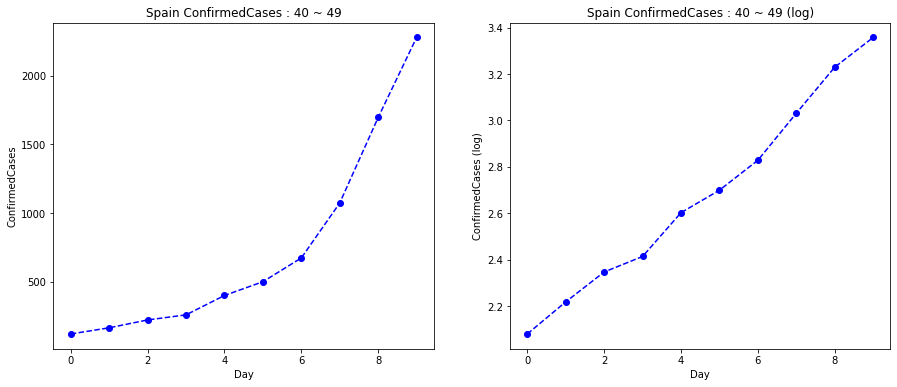

In [ ]:

# plot ' Spain' covid-Confiremedcases graph between march 1 to march 11.
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
y1 = all_data[(all_data['Country_Region']==country_dict['Spain']) & (all_data['Day_num']>39) & (all_data['Day_num']<=49)][['ConfirmedCases']]
x1 = range(0, len(y1))
ax1.plot(x1, y1, 'bo--')
ax1.set_title("Spain ConfirmedCases : 40 ~ 49")
ax1.set_xlabel("Day")
ax1.set_ylabel("ConfirmedCases")

## To do ###
# Hint : using the above process but you have to transform your variable to log scale.
##apply log transform to y variables ## 
y2 = all_data[(all_data['Country_Region']==country_dict['Spain']) & (all_data['Day_num']>39) & (all_data['Day_num']<=49)][['ConfirmedCases']]
y2_log = np.log10(y2)
x2 = range(0, len(y2))
ax2.plot(x2, y2_log, 'bo--')
ax2.set_title("Spain ConfirmedCases : 40 ~ 49 (log)")
ax2.set_xlabel("Day")
ax2.set_ylabel("ConfirmedCases (log)")


![image.png](attachment:image.png)

In [ ]:
##don`t touch this cell##

# Filter selected features
data = all_data.copy()
features = ['Id', 'ForecastId', 'Country_Region', 'Province_State', 'ConfirmedCases', 'Fatalities', 
       'Day_num']
data = data[features]

# Apply log transformation to all ConfirmedCases and Fatalities columns, except for trends
data[['ConfirmedCases', 'Fatalities']] = data[['ConfirmedCases', 'Fatalities']].astype('float64')
data[['ConfirmedCases', 'Fatalities']] = data[['ConfirmedCases', 'Fatalities']].apply(lambda x: np.log1p(x))

# Replace infinites
data.replace([np.inf, -np.inf], 0, inplace=True)


### <br/>Problem 2-2  complete below function to  Split data into train/test and apply linear regression

In [ ]:
#  Split data into train/test
def split_data(df, train_lim, test_lim):
    
    df.loc[df['Day_num']<=train_lim , 'ForecastId'] = -1
    df = df[df['Day_num']<=test_lim]
    
    ##To do ## for Train set 
    x_train = df[df.ForecastId == -1].drop(['ConfirmedCases', 'Fatalities'], axis=1)
    y_train_1 = df[df.ForecastId == -1]['ConfirmedCases']
    y_train_2 = df[df.ForecastId == -1]['Fatalities']

    ##To do ## for  Test set
    x_test = df[df.ForecastId != -1].drop(['ConfirmedCases', 'Fatalities'], axis=1)

    # Clean Id columns and keep ForecastId as index
    x_train.drop('Id', inplace=True, errors='ignore', axis=1)
    x_train.drop('ForecastId', inplace=True, errors='ignore', axis=1)
    x_test.drop('Id', inplace=True, errors='ignore', axis=1)
    x_test.drop('ForecastId', inplace=True, errors='ignore', axis=1)
    
    return x_train, y_train_1, y_train_2, x_test #check to devide y_dataset 


# Linear regression model
def lin_reg(X_train, Y_train, X_test):
    ##To do ##   Create linear regression object
    regr = linear_model.LinearRegression()

    ## To do ##  Train the model using the training sets
    regr.fit(X_train, Y_train)

    # To do ## Make predictions using the testing set
    y_pred = regr.predict(X_test)
    
    return regr, y_pred





In [ ]:
##don`t touch this cell##
dates_list = ['2020-03-01', '2020-03-02', '2020-03-03', '2020-03-04', '2020-03-05', '2020-03-06', '2020-03-07', '2020-03-08', '2020-03-09', 
                 '2020-03-10', '2020-03-11','2020-03-12','2020-03-13','2020-03-14','2020-03-15','2020-03-16','2020-03-17','2020-03-18',
                 '2020-03-19','2020-03-20','2020-03-21','2020-03-22','2020-03-23', '2020-03-24', '2020-03-25', '2020-03-26', '2020-03-27', 
                 '2020-03-28', '2020-03-29', '2020-03-30', '2020-03-31', '2020-04-01', '2020-04-02', '2020-04-03', '2020-04-04', '2020-04-05', 
                 '2020-04-06', '2020-04-07', '2020-04-08', '2020-04-09', '2020-04-10', '2020-04-11', '2020-04-12', '2020-04-13', '2020-04-14','2020-04-15','2020-04-16','2020-04-17','2020-04-18','2020-04-19',
                '2020-04-20','2020-04-21','2020-04-22','2020-04-23','2020-04-24','2020-04-25','2020-04-26','2020-04-27','2020-04-28','2020-04-29','2020-04-30',
                '2020-05-01','2020-05-02','2020-05-03','2020-05-04','2020-05-05','2020-05-06','2020-05-07','2020-05-08','2020-05-09','2020-05-10','2020-05-11',
                '2020-05-12','2020-05-13'
              ]
def plot_linreg_basic_country(data, country_name, dates_list, day_start, shift, train_lim, test_lim):
    
    data_country = data[data['Country_Region']==country_dict[country_name]]
    data_country = data_country.loc[data_country['Day_num']>=day_start]
    X_train, Y_train_1, Y_train_2, X_test = split_data(data_country, train_lim, test_lim)
    model, pred = lin_reg(X_train, Y_train_1, X_test)

    # Create a df with both real cases and predictions (predictions starting on March 12th)
    X_train_check = X_train.copy()
    X_train_check['Target'] = Y_train_1

    X_test_check = X_test.copy()
    X_test_check['Target'] = pred

    X_final_check = pd.concat([X_train_check, X_test_check])

    # Select predictions from March 1st to March 25th
    predicted_data = X_final_check.loc[(X_final_check['Day_num'].isin(list(range(day_start, day_start+len(dates_list)))))].Target
    real_data = train.loc[(train['Country_Region']==country_name) & (train['Date'].isin(dates_list))]['ConfirmedCases']
    dates_list_num = list(range(0,len(dates_list)))

    # Plot results
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))

    ax1.plot(dates_list_num, np.expm1(predicted_data))
    ax1.plot(dates_list_num, real_data)
    ax1.axvline(30-shift, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax1.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax1.set_xlabel("Day count (from March " + str(1+shift) + " to March 25th)")
    ax1.set_ylabel("Confirmed Cases")

    ax2.plot(dates_list_num, predicted_data)
    ax2.plot(dates_list_num, np.log1p(real_data))
    ax2.axvline(30-shift, linewidth=2, ls = ':', color='grey', alpha=0.5)
    ax2.legend(['Predicted cases', 'Actual cases', 'Train-test split'], loc='upper left')
    ax2.set_xlabel("Day count (from March " + str(1+shift) + " to March 30th)")
    ax2.set_ylabel("Log Confirmed Cases")

    plt.suptitle(("ConfirmedCases predictions based on Log-Lineal Regression for "+country_name))

### <br/>Problem 2-3  using above function'plot_linreg_basic_country' run the Linear Regression workflow in 'Korea, South' case
 - your completed graph doesn't have to be the same as the example.


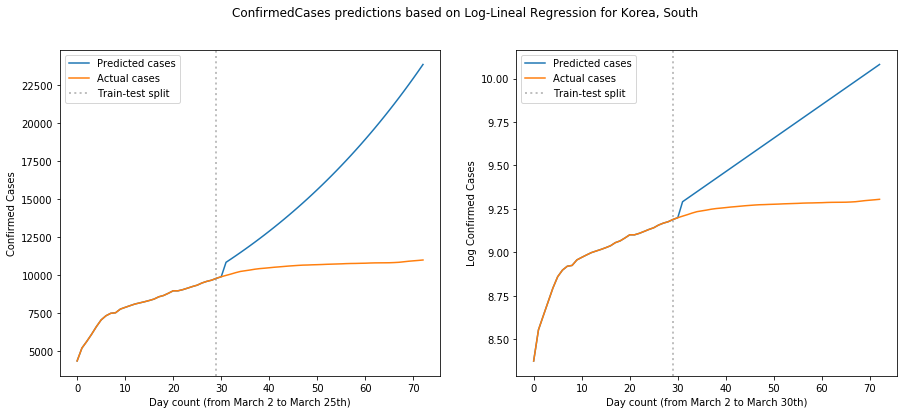

In [ ]:
## To do ##
country_name = 'Korea, South'   
daynum = 1
day_start = 39+daynum
dates_list2 =  dates_list[daynum:]
train_lim, test_lim = 69, 112
plot_linreg_basic_country(data, country_name, dates_list2, day_start, daynum, train_lim, test_lim)

![image.png](attachment:image.png)

### <br/>Problem 2-4 Describe the significance and limitations of the graph above.

### YOUR ANSWER HERE ###

단순한 모델을 사용했음에도 증가 추이가 어느정도는 반영되어 있다.

하지만 3월에 급격하게 확진 케이스가 증가함에 따라 3월 전체데이터가 사용되어 

예측치가 과도하게 크게 나타난다.


기간을 일정 환자수 이상(10명 정도) 부터로 줄여서 트레이닝 시키면 보다 정확한 

예측치가 나타날 것이다.


그리고 초기단계에서는 exponential 하게 증가하지만 그 이후는 방역조치, 집단면역 
등으로 실제 수치는 꺾이게 되는데

그런 부분이 덜 반영되어 예측치는 초기의 증가분을 과도하게 반영하게 되어 
exponential 한 증가를 보인다.


반면, 방역조치가 없다면 실제로 exponential 한 증가를 할 수도 있었는데 
방역조치를 통해 어느정도 억제에 성공한 것으로
해석할 수도 있다.



## 3. Caculating Stringency Indexes of six countries 

Reference : https://www.bsg.ox.ac.uk/sites/default/files/Calculation%20and%20presentation%20of%20the%20Stringency%20Index.pdf

Look at the document above and learn about Stringency Index (not legacy stringency index!!)

## 3-1 Data filtering

In [ ]:
#load csv file you care ("OxCGRT_latest.csv")
###YOUR CODE HERE###
data = pd.read_csv("./data/OxCGRT_latest.csv")

In [ ]:
#Filter rows with six unique countries by 'CountryName'
#('CountryName' == Australia, China, Japan, New Zealand, Singapore, South Korea)
###YOUR CODE HERE###
data2 = data[data['CountryName'].isin(['Australia', 'China', 'Japan', 'New Zealand', 'Singapore', 'South Korea'])]

In [ ]:
#Drop columns you don't need
#print dataframe you care about
###YOUR CODE HERE###
#use columns : 
"""
['CountryName', 'Date', 'C1_School closing', 'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events','C3_Flag',
'C4_Restrictions on gatherings','C4_Flag','C5_Close public transport','C5_Flag','C6_Stay at home requirements','C6_Flag',
'C7_Restrictions on internal movement','C7_Flag','C8_International travel controls','H1_Public information campaigns','H1_Flag']
"""
data3 = data2[['CountryName', 'Date', 'C1_School closing', 'C1_Flag', 'C2_Workplace closing', 'C2_Flag', 'C3_Cancel public events','C3_Flag',
'C4_Restrictions on gatherings','C4_Flag','C5_Close public transport','C5_Flag','C6_Stay at home requirements','C6_Flag',
'C7_Restrictions on internal movement','C7_Flag','C8_International travel controls','H1_Public information campaigns','H1_Flag'
,'StringencyIndex']]
 
data3.rename(columns = {'C1_School closing': 'C1',
    'C2_Workplace closing': 'C2',
    'C3_Cancel public events': 'C3',
    'C4_Restrictions on gatherings': 'C4',
    'C5_Close public transport': 'C5',
    'C6_Stay at home requirements': 'C6',
    'C7_Restrictions on internal movement': 'C7',
    'C8_International travel controls': 'C8',
    'H1_Public information campaigns': 'C9',
    'H1_Flag': 'C9_Flag'}, inplace = True)
 
data3

,CountryName,Date,C1,C1_Flag,C2,C2_Flag,C3,C3_Flag,C4,C4_Flag,C5,C5_Flag,C6,C6_Flag,C7,C7_Flag,C8,C9,C9_Flag,StringencyIndex
947,Australia,20200101,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
948,Australia,20200102,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
949,Australia,20200103,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
950,Australia,20200104,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
951,Australia,20200105,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,NaN,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,Singapore,20200510,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17721,Singapore,20200511,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17722,Singapore,20200512,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17723,Singapore,20200513,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 3-2 Calculating Stringency Index

you can use some pakages to deal with 'nan' values

In [ ]:
#stringency calculation
#step1 : calculate weight for a policy of general scope
###YOUR CODE HERE###
data4 = data3.copy()
data4 = data4.fillna(0)

data4.insert(2,  "w1", data4[['C1_Flag']].applymap(lambda x: None if pd.isnull(x) else 1/(3+1)) , True) 
data4.insert(3,  "w2", data4[['C2_Flag']].applymap(lambda x: None if pd.isnull(x) else 1/(3+1)) , True) 
data4.insert(4,  "w3", data4[['C3_Flag']].applymap(lambda x: None if pd.isnull(x) else 1/(2+1)) , True) 
data4.insert(5,  "w4", data4[['C4_Flag']].applymap(lambda x: None if pd.isnull(x) else 1/(4+1)) , True) 
data4.insert(6,  "w5", data4[['C5_Flag']].applymap(lambda x: None if pd.isnull(x) else 1/(2+1)) , True) 
data4.insert(7,  "w6", data4[['C6_Flag']].applymap(lambda x: None if pd.isnull(x) else 1/(3+1)) , True) 
data4.insert(8,  "w7", data4[['C7_Flag']].applymap(lambda x: None if pd.isnull(x) else 1/(2+1)) , True) 
data4.insert(9, "w9", data4[['C9_Flag']].applymap(lambda x: None if pd.isnull(x) else 1/(2+1)) , True) 
data4.insert(2, "w",data4[["w1","w2","w3","w4","w5","w6","w7","w9"]].mean(axis=1)  , True) 
data4


,CountryName,Date,w,w1,w2,w3,w4,w5,w6,w7,...,C5,C5_Flag,C6,C6_Flag,C7,C7_Flag,C8,C9,C9_Flag,StringencyIndex
947,Australia,20200101,0.285417,0.25,0.25,0.333333,0.2,0.333333,0.25,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
948,Australia,20200102,0.285417,0.25,0.25,0.333333,0.2,0.333333,0.25,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
949,Australia,20200103,0.285417,0.25,0.25,0.333333,0.2,0.333333,0.25,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
950,Australia,20200104,0.285417,0.25,0.25,0.333333,0.2,0.333333,0.25,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
951,Australia,20200105,0.285417,0.25,0.25,0.333333,0.2,0.333333,0.25,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,Singapore,20200510,0.285417,0.25,0.25,0.333333,0.2,0.333333,0.25,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17721,Singapore,20200511,0.285417,0.25,0.25,0.333333,0.2,0.333333,0.25,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17722,Singapore,20200512,0.285417,0.25,0.25,0.333333,0.2,0.333333,0.25,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17723,Singapore,20200513,0.285417,0.25,0.25,0.333333,0.2,0.333333,0.25,0.333333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#step2 : calculate sub-indices
#calculate C1-C9, G1-G8, and I1-I9 
###YOUR CODE HERE###
data4.insert(2,  "I1",np.zeros(len(data4)).astype(np.float64), True) 
data4.insert(3,  "I2",np.zeros(len(data4)).astype(np.float64), True) 
data4.insert(4,  "I3",np.zeros(len(data4)).astype(np.float64), True) 
data4.insert(5,  "I4",np.zeros(len(data4)).astype(np.float64), True) 
data4.insert(6,  "I5",np.zeros(len(data4)).astype(np.float64), True) 
data4.insert(7,  "I6",np.zeros(len(data4)).astype(np.float64), True) 
data4.insert(8,  "I7",np.zeros(len(data4)).astype(np.float64), True) 
data4.insert(9,  "I8",np.zeros(len(data4)).astype(np.float64), True) 
data4.insert(10, "I9",np.zeros(len(data4)).astype(np.float64), True) 
data4

,CountryName,Date,I1,I2,I3,I4,I5,I6,I7,I8,...,C5,C5_Flag,C6,C6_Flag,C7,C7_Flag,C8,C9,C9_Flag,StringencyIndex
947,Australia,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
948,Australia,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
949,Australia,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
950,Australia,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
951,Australia,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,Singapore,20200510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17721,Singapore,20200511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17722,Singapore,20200512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17723,Singapore,20200513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#step3 : calculate stringency index I (up to 2 decimal points)
###YOUR CODE HERE###
index = list(data4.index)
for i in index:
  data4.I1[i] = 100 * ( data4.C1[i]*(1-data4.w[i])/3 + data4.w[i] * data4.C1_Flag[i] )
  data4.I2[i] = 100 * ( data4.C2[i]*(1-data4.w[i])/3 + data4.w[i] * data4.C2_Flag[i] )
  data4.I3[i] = 100 * ( data4.C3[i]*(1-data4.w[i])/2 + data4.w[i] * data4.C3_Flag[i] )
  data4.I4[i] = 100 * ( data4.C4[i]*(1-data4.w[i])/4 + data4.w[i] * data4.C4_Flag[i] )
  data4.I5[i] = 100 * ( data4.C5[i]*(1-data4.w[i])/2 + data4.w[i] * data4.C5_Flag[i] )
  data4.I6[i] = 100 * ( data4.C6[i]*(1-data4.w[i])/3 + data4.w[i] * data4.C6_Flag[i] )  
  data4.I7[i] = 100 * ( data4.C7[i]*(1-data4.w[i])/2 + data4.w[i] * data4.C7_Flag[i] )
  data4.I8[i] = 100 * ( data4.C8[i]/4 )                               
  data4.I9[i] = 100 * ( data4.C9[i]*(1-data4.w[i])/2 + data4.w[i] * data4.C9_Flag[i] )  

data4

,CountryName,Date,I1,I2,I3,I4,I5,I6,I7,I8,...,C5,C5_Flag,C6,C6_Flag,C7,C7_Flag,C8,C9,C9_Flag,StringencyIndex
947,Australia,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
948,Australia,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
949,Australia,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
950,Australia,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
951,Australia,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,Singapore,20200510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17721,Singapore,20200511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17722,Singapore,20200512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17723,Singapore,20200513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#step4 : make your stingency index array into dataframe(column name = 'my_StringencyIndex') and concat it(axis = 1) to the result of 1-1 
###YOUR CODE HERE###
data5 = data4.copy()
data5 = data5.fillna(0)

data5.insert(2, "my_StringencyIndex",data5[["I1","I2","I3","I4","I5","I6","I7","I8","I9"]].mean(axis=1).round(decimals=2)  , True)  
data5.insert(3, "StringencyIndex(Original)",data5.StringencyIndex  , True) 

data5

,CountryName,Date,my_StringencyIndex,StringencyIndex(Original),I1,I2,I3,I4,I5,I6,...,C5,C5_Flag,C6,C6_Flag,C7,C7_Flag,C8,C9,C9_Flag,StringencyIndex
947,Australia,20200101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
948,Australia,20200102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
949,Australia,20200103,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
950,Australia,20200104,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
951,Australia,20200105,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17720,Singapore,20200510,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17721,Singapore,20200511,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17722,Singapore,20200512,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17723,Singapore,20200513,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# If fewer than six policy indicators have data on a given day, the index calculation is rejected and no value is returned
# 지표 6개 미만은 0처리
hasUnder6 = data3[["C1","C2","C3","C4","C5","C6","C7","C9"]].isnull().sum(axis=1) >= 6
data5["my_StringencyIndex"][hasUnder6] = 0

### 기존 StringencyIndex와 값이 같음을 검증 (비교가 쉽게 0보다 큰값 출력)
#hasMyIndex = data5['my_StringencyIndex'] == data5['StringencyIndex(Original)']
hasMyIndex = data5['my_StringencyIndex'] > 0
dataHasMyIndex = data5[hasMyIndex]
dataHasMyIndex

,CountryName,Date,my_StringencyIndex,StringencyIndex(Original),I1,I2,I3,I4,I5,I6,...,C5,C5_Flag,C6,C6_Flag,C7,C7_Flag,C8,C9,C9_Flag,StringencyIndex
971,Australia,20200125,7.94,7.94,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.94
972,Australia,20200126,7.94,7.94,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.94
973,Australia,20200127,7.94,7.94,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.94
974,Australia,20200128,7.94,7.94,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.94
975,Australia,20200129,7.94,7.94,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,7.94
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17710,Singapore,20200430,87.83,87.83,100.0,100.0,100.0,100.0,64.270833,76.180556,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,87.83
17711,Singapore,20200501,87.83,87.83,100.0,100.0,100.0,100.0,64.270833,76.180556,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,87.83
17712,Singapore,20200502,87.83,87.83,100.0,100.0,100.0,100.0,64.270833,76.180556,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,87.83
17713,Singapore,20200503,87.83,87.83,100.0,100.0,100.0,100.0,64.270833,76.180556,...,1.0,1.0,2.0,1.0,2.0,1.0,2.0,2.0,1.0,87.83


## Problem4. Topic Modeling (Clustering analysis of documents) for tweets related to COVID-19
A **topic model** is a type of statistical model for discovering the abstract "topics" that occur in a collection of documents.
 Please refer to [wikipedia](https://en.wikipedia.org/wiki/Topic_model#:~:text=In%20machine%20learning%20and%20natural,structures%20in%20a%20text%20body.) for detailed information.
- These documents were crawled from *twitter* with some *COVID-19* related keywords . All tweets are in English but have a lot of noisy information.
- In this problem, your goal is to cluster tweets according to the latent 'topics' with the statistical method, automatically. 


### Load the csv file using pandas library

In [ ]:
df = pd.read_csv('./data/covid_twitter.csv') #set your working directory
text_en = df['text']
print(df.shape)
print(df.head())

(36121, 2)
   Unnamed: 0                                               text
0           6  .@PatriceHarrisMD spoke with @YahooFinance abo...
1          14  #CoronaUpdate | Johns Hopkins University has s...
2          17  Singapore donates 40,000 test kits to the Phil...
3          28  Lockdowns, drones: Will things ever go back to...
4          30  Does the #COVID19 pandemic have you feeling ou...


### Problem 4-1 Text Preprocessing
First of all, you should process the documents so that the model will not be perturbed by the noisy information

**a. Remove the following characters with *'re'* module in each tweets**
- special characters ( # @ , . | ? ! )
- *COVID* relavant words (COVID19, coronavirus, coronaoutbreak)

In [ ]:
### YOUR CODE HERE ###
#Hint. repeat first sentence process but change parameter to fit your gal
text_en2 = text_en.apply(lambda x: re.sub(r"[\#\@\,\.\d\'\|\(\)\-]", "", str(x)))
text_en3 = text_en2.apply(lambda x: re.sub(r"(COVID19)|(coronavirus)|(coronaoutbreak)|(COVID)", "", str(x)))
text_en3

0        PatriceHarrisMD spoke with YahooFinance about ...
1        CoronaUpdate  Johns Hopkins University has sai...
2        Singapore donates  test kits to the Philippines  
3        Lockdowns drones: Will things ever go back to ...
4        Does the  pandemic have you feeling outofcontr...
                               ...                        
36116    Top public health officer says coming week a c...
36117    Went for a run this evening\nGod reminded me t...
36118    Trump ~ Millions of face masks being made thou...
36119    For many students in our state  closures are i...
36120    Will the  pandemic of  come to be seen as a mo...
Name: text, Length: 36121, dtype: object

**b. Remove the *stop words* in each tweets**

*Stop words* are words which should be filtered out before given to the model. Please refer to [wikipedia](https://en.wikipedia.org/wiki/Stop_words#:~:text=In%20SEO%20terminology%2C%20stop%20words,save%20space%20in%20their%20databases.) for detailed information 
- First, you should download the stop word set from *nltk* module.

In [ ]:
### NLP toolkit ###
import nltk
from nltk.corpus import stopwords

In [ ]:
### Download the set with this
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [ ]:
### check the set with this
stop_words = set(stopwords.words('english'))
print(stop_words)

{'there', 'such', 'off', 'for', 'any', 'o', 'a', 'should', 'them', "she's", "hasn't", 'this', 'we', 'shouldn', 'yourself', 'yours', "should've", "needn't", 'd', 'theirs', 'shan', 'isn', 'which', 'more', 'didn', 'yourselves', 'these', 'through', 'under', 'only', 'what', "you've", 'both', "don't", 'now', 'over', 'their', 'whom', 'down', 've', 'as', 'from', "mustn't", 'about', 'won', 'll', 'here', 'on', 't', "mightn't", "you'll", 'its', 'not', 'be', 'too', "it's", 'haven', 'having', 'who', 'y', 'aren', "shouldn't", 'because', "wouldn't", 'hadn', 'it', 'once', 'no', 'myself', 'ma', 'herself', 'can', 'himself', 'your', "haven't", 'other', 'ourselves', 'was', 'out', 'do', 'most', 'he', 'ain', 'is', 'why', 'him', 'couldn', 'wasn', 'were', 'during', 'hasn', 'you', 'how', 'an', 'than', 'into', 're', 'his', 'been', 'don', 'they', "wasn't", 'and', 'up', "didn't", 'before', "that'll", 'mightn', 'doing', "aren't", 'will', 'hers', 'her', 'wouldn', 'above', 'i', 'are', 'those', "shan't", 'of', 'so', 

**a. Update your set with some stop words which are not needed for modeling, you think.**

In [ ]:
### YOUR CODE HERE ###
#Hint in the paremeter '' input your stop_words
stop_words.update(['new','amp','need','us'])

**b. Remove stop words from the tweet dataset with your own stop words set**

In [ ]:
### YOUR CODE HERE ###
for i in stop_words :
    text_en3 = text_en3.replace(to_replace=r'\b%s\b'%i, value="",regex=True)

### Problem 4-2 Convert the documents to a tf-idf matrix 
*TF-IDF* is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. Please refer to [this](http://mlwiki.org/index.php/TF-IDF)
- Please use the results of 4-1
- First, transform your tweets dataset into tf-idf matrix using the module below
- Print your tf-idf matrix after converting it into *pandas.DataFrame* format
- Set your own hyperparams.

In [ ]:
### scikit learn ###
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
### YOUR CODE HERE ###
tfidf_vectorizer = TfidfVectorizer(min_df = 20, stop_words = stop_words)
tfidf_vectorizer.fit(text_en3)
tfidf_vectorizer.vocabulary_
sorted(tfidf_vectorizer.vocabulary_.items())[0:20]
texts = tfidf_vectorizer.transform(text_en3)

### Problem 4-3 Cluster the tf-idf matrix of tweets using the *K-Means* algorithm.
- Set your own hyperparams

In [ ]:
### scikit learn ###
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans

**a. Find an optimal value for the number of clusters using the *elbow method***
- Draw the plot for SSD(Sum of the Squared Distance) of *K-Means* algorithm by the number of clusters, K, as shown in the example


Example
![image.png](attachment:image.png)

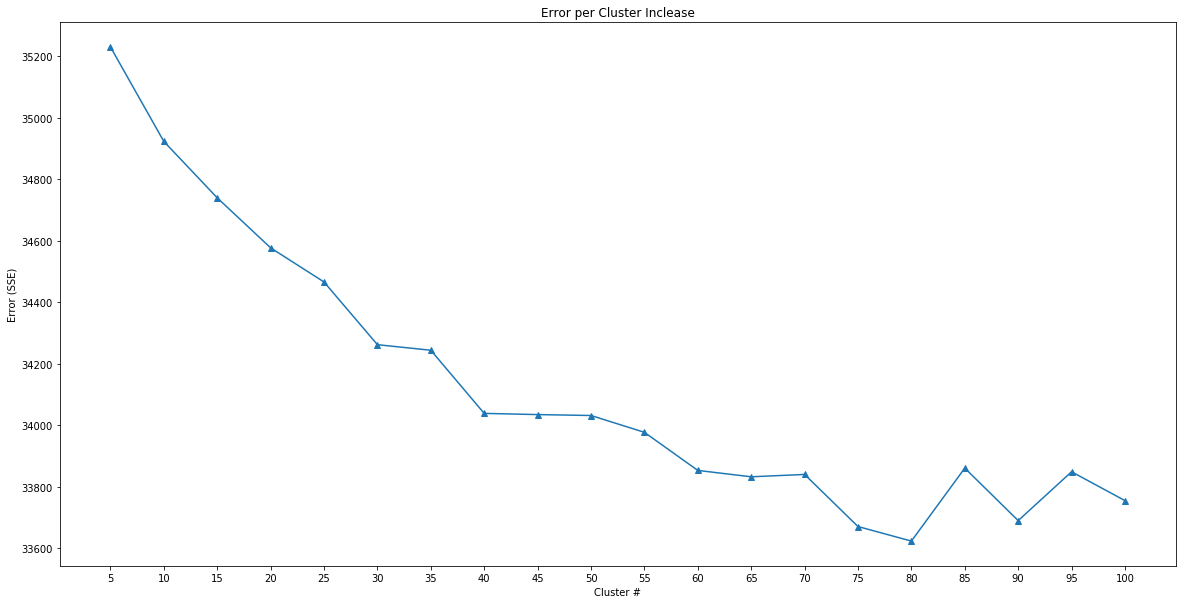

In [ ]:
### YOUR CODE HERE ###
def repeat_elbow(data, max_k):
    iters = range(5, max_k+1, 5)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        
    f, ax = plt.subplots(1, 1)    
    ax.plot(iters, sse, marker='^')
    ax.set_xlabel('Cluster #')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('Error (SSE)')
    ax.set_title('Error per Cluster Inclease')
    plt.rcParams["figure.figsize"] = (20,6)
    plt.show()
    
repeat_elbow(texts, 100)

**b. Based on the your plot above, pick a proper value for K and justify why.**

It is OK that you can't find any proper value for K. If not, specify why these are not proper.

**### YOUR DESCRIPTION HERE ###**
 
 

기울기의 감소율이 극대값을 가지는 40, 65, 80 을 후보로 볼 수 있으며

클러스터가 너무 많을 경우 클러스터링을 하는 의미가 없을 수 있으며

오차율과 오버피팅 등을 고려할 때 40을 적절한 K 값으로 볼 수 있다.

### Problem 4-4 Visualize your clusters to evaluate the results of clustering analysis.

**a. Assgin the cluster index for each tweet with K=14**
- In other words, predict the label for each example

In [ ]:
### YOUR CODE HERE ###
clusters = MiniBatchKMeans(n_clusters=14, init_size=1024, batch_size=2048, random_state=20).fit_predict(texts)

**b. Fill the function in below, which visualizes your clusters with PCA and TSNE**

Both *PCA* and *TSNE* are the most common visualization techniques in the machine learning community. It is usually known that TSNE could capture the non-linear relationship between datapoints than PCA. For more detailed information, please refer to [this](https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding)
- At first, this function randomly selects some samples for fitting PCA, depending on your device's capability.
- Get the PCA matrices from the results of 4-2(tf-idf matrix) where the number of principal components is 2, each.
- If you are uncomfortable with this function, you can make your own function to accomplish the same goal with this.

Example
![image.png](attachment:image.png)

In [ ]:
### visualization methods ###
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
### for plotting ###
import matplotlib.cm as cm

In [ ]:
def plot_tsne_pca(data, labels):
    '''
    This function plots the PCA and t-SNE on 2D plane.
    args:
        data: tf-idf weight matrix
        labels: predictions from K-means
    '''
    # initial set up and random pick up samples
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=2000, replace=False)
    
    ######################## YOUR CODE HERE ########################
    '''
    pca (2000 x 2) : extract 2 eigenvectors that have the most explained variance
    tsne (2000 x 2) : feed the 50 principal components to t-SNE
                     For TSNE, you can use the TSNE().fit_transform() function.
    '''
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(data[max_items,:].todense()))
    
    #################################################################
    
    # random pick certain size of data points for visiualization
    idx = np.random.choice(range(pca.shape[0]), size=400, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    # plot PCA
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster')
    
    # plot t-SNE
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster')

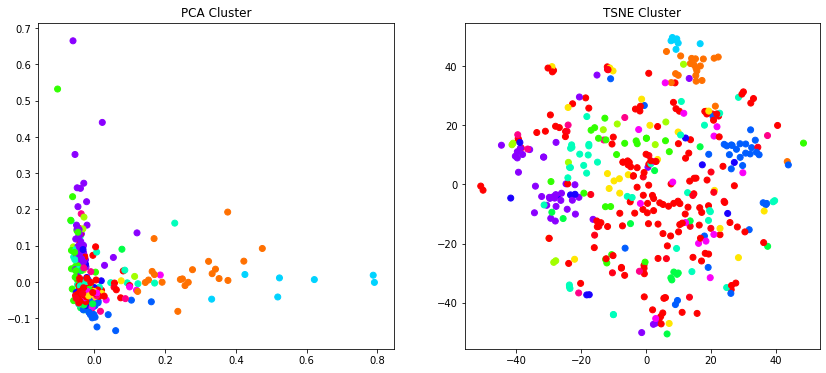

In [ ]:
### YOUR CODE HERE ###
# plot PCA and t-SNE reduced data with above function
plot_tsne_pca(texts, clusters)

### Problem 4-5 Extract keywords from each clusters

**a. get the top keywords from each cluster you've got from 4-4 (a.), based on the tf-idf matrix values**

- Use the function in below or make your own function to achieve the same goal with this function.

Example
![image.png](attachment:image.png)

In [ ]:
def get_top_keywords(data, clusters, labels, n_terms=10):
    '''
    This function displays the top keywords based on tf-idf score.
    data = tf-idf array
    clusters = assigned cluster index
    labels = vectorizer.get_feature_names()
    n_terms = top n keywords
    '''
    #  based on predictions
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    
    # loop through each clusters and print top 10 score words
    for i,r in df.iterrows():
        print('\nCluster {}'.format(i))
        print(','.join([labels[t] for t in np.argsort(r)[-n_terms:]]))

In [ ]:
### YOUR CODE HERE ###
get_top_keywords(texts, clusters, tfidf_vectorizer.get_feature_names(), 10)


Cluster 0
like,get,world,china,crisis,time,one,coronavirusoutbreak,help,pandemic

Cluster 1
death,march,county,positive,reported,total,number,deaths,confirmed,cases

Cluster 2
april,death,realdonaldtrump,says,crisis,president,pandemic,china,trump,coronavirus

Cluster 3
food,stayathomeandstaysafe,day,coronaupdate,covid,people,coronavirus,india,covid_,lockdown

Cluster 4
share,spread,fight,keep,covid_,help,safe,please,home,stay

Cluster 5
coronavirus,crisis,covid,pandemic,good,workers,mental,care,public,health

Cluster 6
help,virus,pandemic,get,died,coronavirus,many,covid_,know,people

Cluster 7
reported,covid,coronavirusoutbreak,coronavirus,reports,bringing,confirmed,deaths,cases,total

Cluster 8
patients,crisis,virus,time,people,spread,help,pandemic,coronavirus,covid

Cluster 9
save,everyone,work,healthcare,working,doctors,nurses,covid_,workers,thank

Cluster 10
like,pandemic,coronalockdown,one,day,time,quarantine,stayathomeandstaysafe,coronaupdate,covid_

Cluster 11
one,covid_,covid,

**b. According to the keywords selected from (a.), describe the differences between clusters or guess the topic of tweets in the specific cluster**

**### YOUR DESCRIPTION HERE ###**

각 클러스터는 주로 다음과 같은 주제를 중심으로 클러스터링 된 것으로 보인다.

Cluster 0 중국발 팬더믹 확산 위기 

Cluster 1 나라별 사망자 확진자 통계

Cluster 2 트럼프의 코로나 발언 관련

Cluster 3 코로나로 인한 사회마비 현상

Cluster 4 확산 방지를 위한 대응책

Cluster 5 공공의료 

Cluster 6 사람 중심의 사례

Cluster 7 코로나 바이러스 보고서

Cluster 8 팬더믹으로 인한 환자수 증가

Cluster 9 의료진에 대한 감사

Cluster 10 방역과 안전대응 방안

Cluster 11 최초 확진자

Cluster 12 각국의 정부 대응 

Cluster 13 치료 및 대응

### End of HW4 ###
Thanks for all your works